<h1 align="center">Spotify Genre Classifier Using Machine Learning</h1>

<h4 align="center">University of Tehran</h4>

<h2>Exploratory Data Analysis and Visualization</h2>

<h3>Introduction</h3>
<br>
Exploratory Data Analysis (EDA) is a process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis

<h3>Importing dependencies</h3>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import math
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import gc
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_set = pd.read_csv('dataset.csv')

<h3>Understand data set attributes</h3>

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       28506 non-null  object 
 1   track_name        30000 non-null  object 
 2   popularity        30000 non-null  float64
 3   acousticness      30000 non-null  float64
 4   danceability      30000 non-null  float64
 5   duration_ms       26990 non-null  float64
 6   energy            30000 non-null  float64
 7   instrumentalness  30000 non-null  float64
 8   key               30000 non-null  object 
 9   liveness          30000 non-null  float64
 10  loudness          30000 non-null  float64
 11  mode              30000 non-null  object 
 12  speechiness       30000 non-null  float64
 13  tempo             27067 non-null  float64
 14  valence           30000 non-null  float64
 15  music_genre       30000 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [5]:
train_set.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,30000.000000,30000.000000,30000.000000,2.699000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,27067.000000,30000.000000
mean,47.769533,0.359661,0.540929,2.466460e+05,0.556709,0.180807,0.183610,-10.079862,0.083861,117.559824,0.446563
std,14.512665,0.364182,0.181719,1.126005e+05,0.277856,0.329365,0.150733,6.953936,0.093366,30.719934,0.248745
min,0.000000,0.000001,0.059600,1.550900e+04,0.000792,0.000000,0.015700,-47.046000,0.022300,34.347000,0.000000
25%,39.000000,0.029600,0.423000,1.904930e+05,0.361000,0.000000,0.095800,-12.057250,0.035000,92.340000,0.243000
50%,49.000000,0.205000,0.553000,2.245600e+05,0.602000,0.000089,0.122000,-7.623000,0.045100,115.491000,0.435000
75%,57.000000,0.710000,0.671000,2.726670e+05,0.786000,0.125250,0.222000,-5.429750,0.080300,139.817500,0.639000
max,99.000000,0.996000,0.977000,3.195440e+06,0.998000,0.994000,0.996000,1.342000,0.941000,219.331000,0.985000


In [6]:
train_set.head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.6210,0.029700,G,0.159,-7.429,Major,0.0382,142.065,0.607,Jazz
1,FloFilz,Corners,34.0,0.34700,0.729,103703.0,0.5150,0.006920,C,0.127,-10.147,Major,0.1840,79.969,0.287,Jazz
2,Bonobo,We Could Forever,51.0,0.01810,0.669,NaN,0.8850,0.880000,G,0.265,-7.080,Minor,0.0378,NaN,0.636,Jazz
3,Nils Landgren,A Child Is Born,39.0,0.91800,0.484,228733.0,0.0693,0.000069,F,0.139,-15.542,Major,0.0346,82.707,0.206,Jazz
4,Masayoshi Takanaka,Samba Pati,36.0,0.03450,0.473,342867.0,0.8230,0.446000,G,0.306,-6.625,Major,0.0630,104.694,0.383,Jazz


In [7]:
missing_data_percent = train_set.isnull().sum() * 100 / len(train_set)
missing_data_percent

artist_name          4.980000
track_name           0.000000
popularity           0.000000
acousticness         0.000000
danceability         0.000000
duration_ms         10.033333
energy               0.000000
instrumentalness     0.000000
key                  0.000000
liveness             0.000000
loudness             0.000000
mode                 0.000000
speechiness          0.000000
tempo                9.776667
valence              0.000000
music_genre          0.000000
dtype: float64

<h2> Distribution Plots </h2>

<h3>Histogram and KDE Plot</h3>

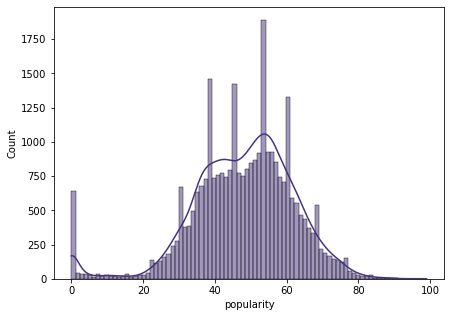

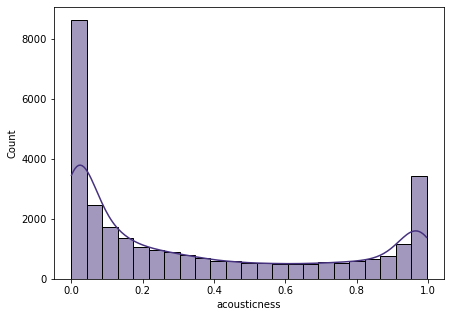

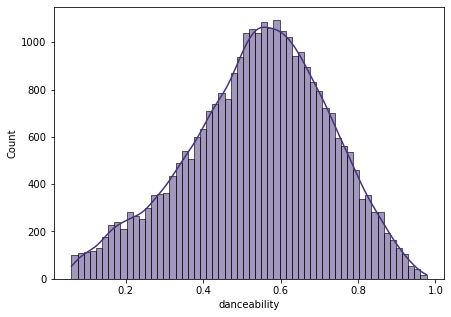

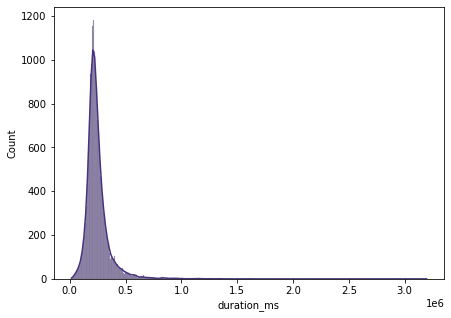

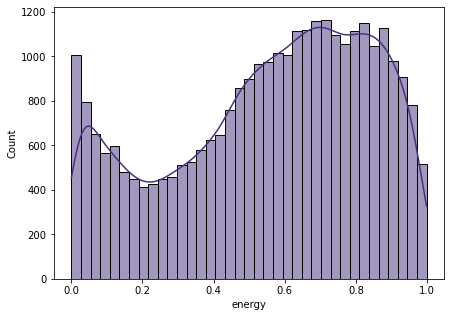

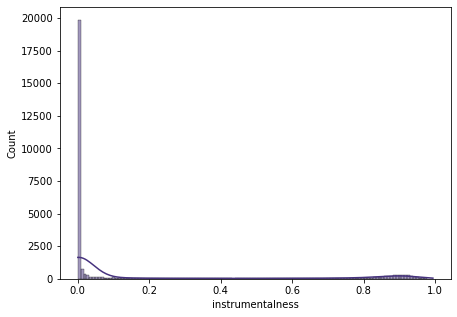

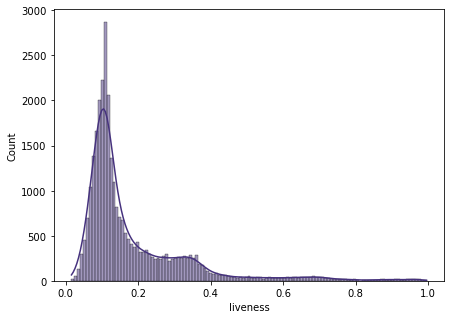

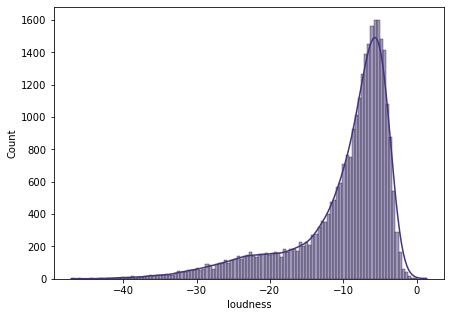

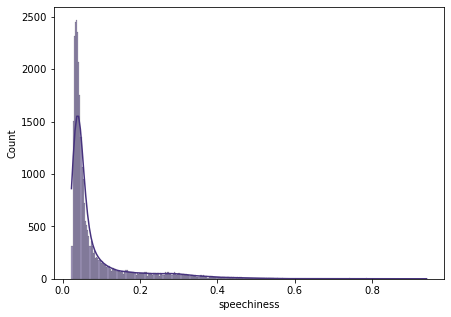

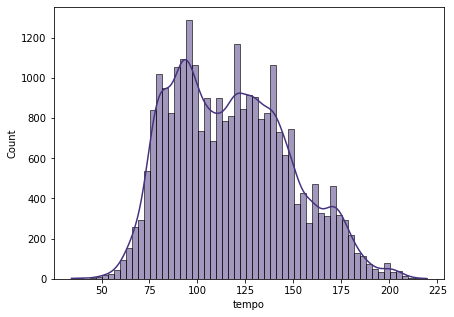

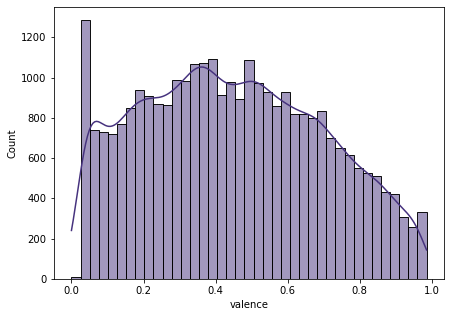

In [8]:
for col in train_set.select_dtypes('float'):
    plt.figure(figsize=(7,5))
    sns.set_palette('viridis')
    sns.histplot(train_set[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


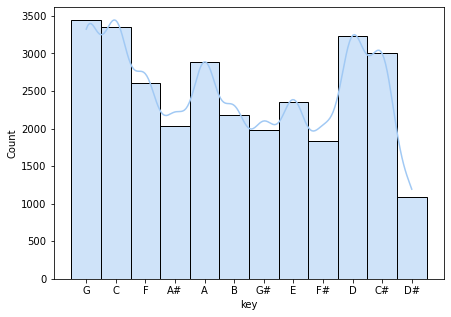

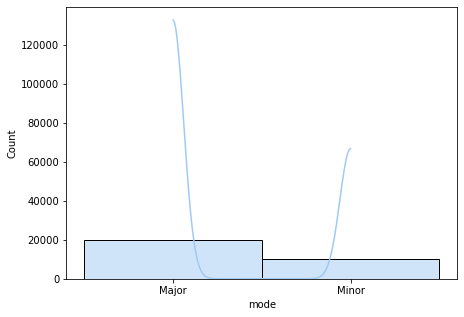

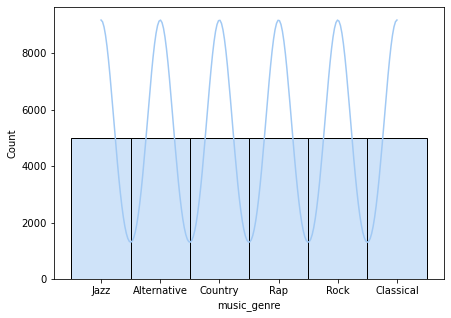

In [9]:
for col in train_set.select_dtypes('object'):
    if col not in ['artist_name', 'track_name']:
        plt.figure(figsize=(7,5))
        sns.set_palette('pastel')
        sns.histplot(x=col, data=train_set, kde=True)
        plt.show()

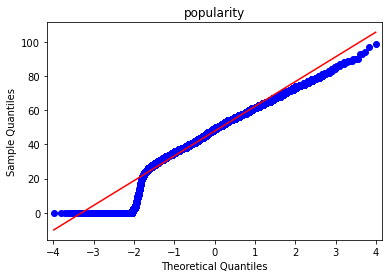

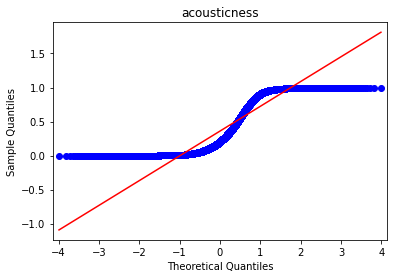

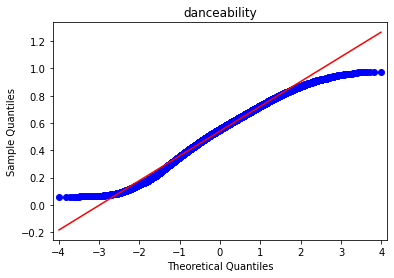

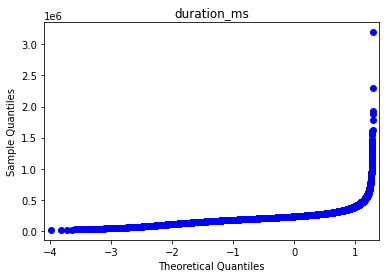

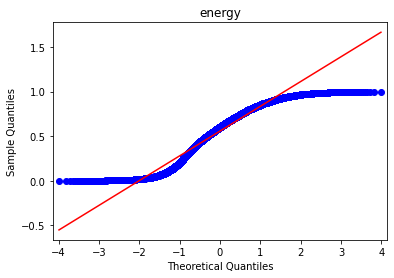

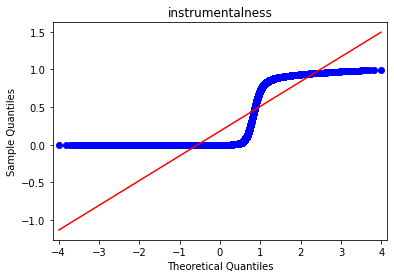

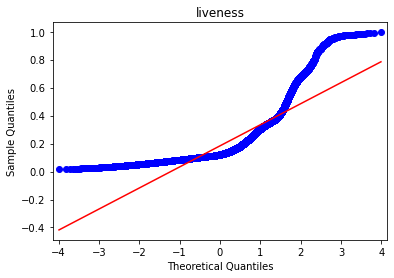

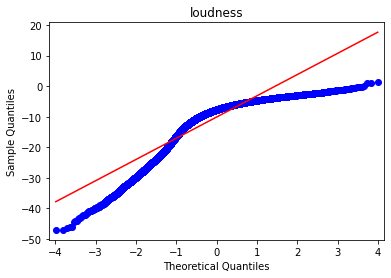

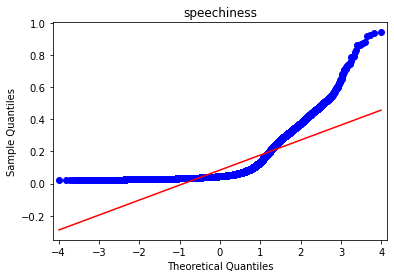

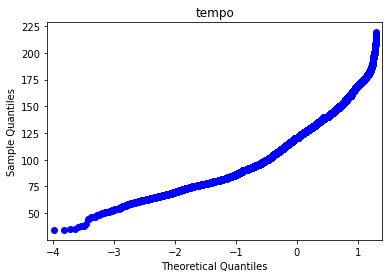

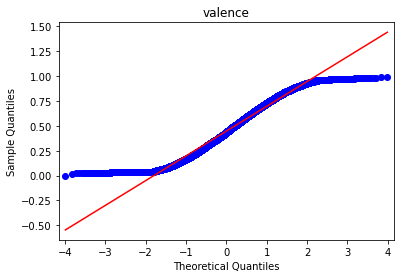

In [10]:
for col in train_set.select_dtypes('float'):
    sm.qqplot(train_set[col], line='s')
    plt.title(col)
    plt.show()

*As you can see here, most of our numerical datas are following* **Normal Distribution.**


<h2>Data Pre-Processing</h2>
<h3>What is Data Pre-Processing and Why is it Important?

Data preprocessing is the process of transforming raw data into an understandable format.

Preprocessing of data is mainly to check the data quality.
<br> The *quality* can be checked by the following:

- **Accuracy**: To check whether the data entered is correct or not.
- **Completeness**: To check whether the data is available or not recorded.
- **Consistency**: To check whether the same data is kept in all the places that do or do not match.
- **Timeliness**: The data should be updated correctly.
- **Believability**: The data should be trustable.
- **Interpretability**: The understandability of the data.

Data processing tasks:
1. Data cleaning
2. Data integration
3. Data reduction
4. Data transformation

<h3>Data Cleaning</h3>

Data cleaning is the process to:
- remove incorrect data
- incomplete data
- inaccurate data from the datasets
- replaces the missing values

<h3>Handling Missing Values</h3>

<h4>Types of Missing Values</h4>
<br>

Formally the missing values are categorized as follows:
1. Missing Completely at Random (MCAR)
2. Missing at Random (MAR)
3. Missing not at Random (MNAR)
<br>

<h4>Why Do We Need to Handle Missing Datas?</h4>
<br>

- Many machine learning algorithms fail if the dataset contains missing values. However, algorithms like K-nearest and Naive Bayes support data with missing values.
- You may end up building a biased machine learning model which will lead to incorrect results if the missing values are not handled properly.
- Missing data can lead to a lack of precision in the statistical analysis.
<br>

<h4>Handle Missing Values Techniques</h4>
<br>

1. Deletions
    - **Pairwise Deletion**
        - A case is dropped if it has some missing values.
        - **Advantages**: Maximizes all data available by an analysis by analysis basis.
        - **Disadvantages**: If the data mechanism is MAR, pairwise deletion will yield biased estimates
    - **Listwise Deletion/ Dropping rows**
        - A case is dropped if at least one of the values are missed.
        - **Advantages**: It is easy to implement and is the default in many statistical packages.
        - **Disadvantages**: It reduces the sample which is being statistically analysed.
2. Basic Imputation Techniques
    - **Imputation with a constant value**
        - It replaces data with a constant value.
        - **Advantages**: It is easy to implement.
        - **Disadvantages**: It can give an unbiased estimation.
    - **Imputation using the statistics (mean, median, mode)**
        -  Impute the missing values with a measure of central tendency — ie., mean, median, or mode.
        - **Advantages**: No loss of data points and statistical consistency.
        - **Disadvantages**: Possibility of skewing data without a strong central tendency
    - **K-Nearest Neighbor Imputation**
        - Identifies the neighboring points through a measure of distance and the missing values can be estimated using completed values of neighboring observations.
        - **Advantages**: The missing data treatment is independent of the learning algorithm used
        - **Disadvantages**:
            - Does not work well with large dataset as calculating distances between each data instance would be very costly.
            - Sensitive to noisy and missing data.
3. Predict Values
    - **Linear Regression**
        - The variable with missing data is used as the dependent variable. Cases with complete data for the predictor variables are used to generate the regression equation; the equation is then used to predict missing values for incomplete cases.
        - **Advantages**: It takes into account the relationship between variables, unlike the mean/median imputation
        - **Disadvantages**: it overestimates the model fit and the correlation between the variables, as it does not take into account the uncertainty in the missing data and underestimates variances and covariances.
    - **Random Forests Regression**
        - Random forest (RF) missing data algorithms are an attractive approach for imputing missing data. They have the desirable properties of being able to handle mixed types of missing data, they are adaptive to interactions and nonlinearity, and they have the potential to scale to big data settings.
        - **Advantages**:
            - Random Forests can hold mixed-type of data
            - Miss Forest can handle outliers, so there is no need for feature scaling.
            - Random Forests have inherent feature selection, which makes them robust to noisy data.
            - It can handle non-linearity in data
        - **Disadvantages**: it reduces the sample which is being statistically analysed.
            - Multiple trees need to be constructed for each iteration, and it becomes computationally expensive when the number of predictors and observations increases.
            - Also, it’s an algorithm, not a model object, meaning it must be run every time data is imputed, which could be problematic in some production environments.
<br>    


<h4> Filling Missing Numerical Values with mean() </h4>

In [11]:
for col in train_set.select_dtypes('float'):
    train_set[col].fillna(value=train_set[col].mean(), inplace=True)

<h4> Filling Missing Categorical Values with most frequent value </h4>

In [12]:
train_set = train_set.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [13]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       30000 non-null  object 
 1   track_name        30000 non-null  object 
 2   popularity        30000 non-null  float64
 3   acousticness      30000 non-null  float64
 4   danceability      30000 non-null  float64
 5   duration_ms       30000 non-null  float64
 6   energy            30000 non-null  float64
 7   instrumentalness  30000 non-null  float64
 8   key               30000 non-null  object 
 9   liveness          30000 non-null  float64
 10  loudness          30000 non-null  float64
 11  mode              30000 non-null  object 
 12  speechiness       30000 non-null  float64
 13  tempo             30000 non-null  float64
 14  valence           30000 non-null  float64
 15  music_genre       30000 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

<h3>Scaling Methods</h3>

The two most common scaling methods are **Normalization** and **Standardization**

<h5>Normalization</h5>

**Normalization or Min-Max Scaling** is a scaling technique in Machine Learning applied during data preparation to change the values of numeric columns in the dataset to use a common scale. 
<br>

<h5>Standardization</h5>

**Standardization or Z-Score Normalization**  is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

<h5>Normalization vs. Standardization</h5>

- **Normalization** is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

- **Standardization**, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

*You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.*

**NOTE** Since we decided that our numerical datas are following normal distribution then we're gonna use **standardization** for our scaling method.

<h3>How to Work with Categorical Values</h3>

Machine learning models require all input and output variables to be numeric and this means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.
The two most popular techniques are:
- **Ordinal Encoding**
    - The number of possible values is often limited to a fixed set.
    - Each unique category value is assigned an integer value.
    - The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.
- **One-Hot Encoding**
    - For categorical variables where no ordinal relationship exists, the integer encoding may not be enough, at best, or misleading to the model at worst.
    - This is where the integer encoded variable is removed and one new binary variable is added for each unique integer value in the variable.
- **Binary Encoding**
    - Binary encoding is a combination of Hash encoding and one-hot encoding.
    - Binary encoding works really well when there are a high number of categories.
    
**NOTE** Since we're gonna use **artist_name** and it has a lot of categories and names, we're gonna use **Ordinal Encoding**.

In [14]:
train_set.drop(['track_name'], axis=1, inplace=True)
one_hot_enc = ce.OneHotEncoder(cols=['key', 'mode']).fit(train_set)
train_set = one_hot_enc.transform(train_set)

ordinal_enc = ce.OrdinalEncoder(cols=['artist_name']).fit(train_set)
train_set = ordinal_enc.transform(train_set)
train_set.head()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key_1,key_2,key_3,...,key_11,key_12,liveness,loudness,mode_1,mode_2,speechiness,tempo,valence,music_genre
0,1,44.0,0.00621,0.711,285987.000000,0.6210,0.029700,1,0,0,...,0,0,0.159,-7.429,1,0,0.0382,142.065000,0.607,Jazz
1,2,34.0,0.34700,0.729,103703.000000,0.5150,0.006920,0,1,0,...,0,0,0.127,-10.147,1,0,0.1840,79.969000,0.287,Jazz
2,3,51.0,0.01810,0.669,246646.049722,0.8850,0.880000,1,0,0,...,0,0,0.265,-7.080,0,1,0.0378,117.559824,0.636,Jazz
3,4,39.0,0.91800,0.484,228733.000000,0.0693,0.000069,0,0,1,...,0,0,0.139,-15.542,1,0,0.0346,82.707000,0.206,Jazz
4,5,36.0,0.03450,0.473,342867.000000,0.8230,0.446000,1,0,0,...,0,0,0.306,-6.625,1,0,0.0630,104.694000,0.383,Jazz


In [15]:
standardized_train_set = train_set.copy()
for col in train_set.select_dtypes('float'):
    scale = StandardScaler().fit(standardized_train_set[[col]])
    standardized_train_set[col] = scale.transform(standardized_train_set[[col]])
train_set = standardized_train_set.copy()

In [16]:
train_set.head()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key_1,key_2,key_3,...,key_11,key_12,liveness,loudness,mode_1,mode_2,speechiness,tempo,valence,music_genre
0,1,-0.259745,-0.970549,0.935920,0.368360,0.231385,-0.458790,1,0,0,...,0,0,-0.163274,0.381209,1,0,-0.489060,8.398199e-01,0.644998,Jazz
1,2,-0.948810,-0.034765,1.034976,-1.338413,-0.150114,-0.527955,0,1,0,...,0,0,-0.375574,-0.009655,1,0,1.072566,-1.288280e+00,-0.641481,Jazz
2,3,0.222600,-0.937900,0.704790,0.000000,1.181532,2.122888,1,0,0,...,0,0,0.539967,0.431398,0,1,-0.493344,3.263047e-14,0.761585,Jazz
3,4,-0.604278,1.533157,-0.313284,-0.167725,-1.754208,-0.548755,0,0,1,...,0,0,-0.295961,-0.785487,1,0,-0.527619,-1.194445e+00,-0.967121,Jazz
4,5,-0.810997,-0.892866,-0.373818,0.900942,0.958392,0.805179,1,0,0,...,0,0,0.811976,0.496829,1,0,-0.223434,-4.409262e-01,-0.255538,Jazz


<AxesSubplot:>

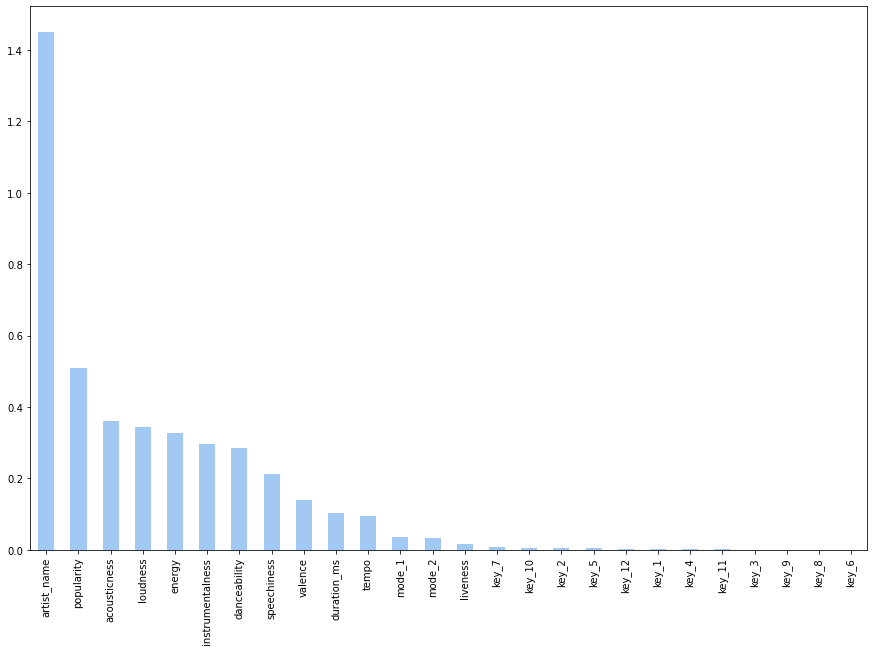

In [17]:
X, y = train_set.drop(['music_genre'], axis=1, inplace=False), train_set['music_genre']
mutual_info = mutual_info_classif(X, y, discrete_features=False)
information_gain = pd.Series(mutual_info)
information_gain.index = X.columns
information_gain.sort_values(ascending=False).plot.bar(figsize=(15,10))

In [18]:
print(information_gain.sort_values(ascending=False))

artist_name         1.449298
popularity          0.510138
acousticness        0.359854
loudness            0.344684
energy              0.327263
instrumentalness    0.296452
danceability        0.284885
speechiness         0.212999
valence             0.141103
duration_ms         0.104412
tempo               0.094244
mode_1              0.035411
mode_2              0.032469
liveness            0.016926
key_7               0.006887
key_10              0.006075
key_2               0.005825
key_5               0.004956
key_12              0.003244
key_1               0.002530
key_4               0.002058
key_11              0.001386
key_3               0.000757
key_9               0.000000
key_8               0.000000
key_6               0.000000
dtype: float64


<h2>Feature Selection Method</h2>

<h3>Introduction</h3>
<br>
Unnecessary and redundant features not only slow down the training time of an algorithm, but they also affect the performance of the algorithm. The process of selecting the most suitable features for training the machine learning model is called **Feature Selection**.

This becomes even more important when the number of features are very large. You need not use every feature at your disposal for creating an algorithm. You can assist your algorithm by feeding in only those features that are really important.

Top reasons to use feature selection are:
- It enables the machine learning algorithm to train faster.
- It reduces the complexity of a model and makes it easier to interpret.
- It improves the accuracy of a model if the right subset is chosen.
- It reduces overfitting.

<h3>Filter Methods for Feature Selection</h3>
<br>
Filters methods belong to the category of feature selection methods that select features independently of the machine learning algorithm model.

- Univariate Filter Methods
    - features are ranked according to specific criteria
    - The top N features are then selected
    - Different types of ranking criteria are used for univariate filter methods:
        - Fisher Score
        - Mutual Information
        - Variance of the Feature
    - Major disadvantage: They may select redundant features because the relationship between individual features is not taken into account while making decisions
    - Univariate filter methods are ideal for 
        - Removing Constant Features
        - Removing Quasi-constant Features
- Multivariate Filter Methods
    - Capable of removing redundant features from the data since they take the mutual relationship between the features into account
    - Multivariate filter methods are ideal for
        - Remove Duplicate Features
        - Remove Correlated Features

In [19]:
train_set_with_artist = train_set.copy()

In [20]:
train_set.drop(['artist_name'], axis=1, inplace=True)
mutual_info_filter = list()
for ig_score in information_gain.sort_values(ascending=False):
    if ig_score < 0.2:
        column = information_gain[information_gain==ig_score].index[0]
        mutual_info_filter.append(column)
train_set.drop(mutual_info_filter, axis=1, inplace=True)
train_set_with_artist.drop(mutual_info_filter, axis=1, inplace=True)
train_set.head()

,popularity,acousticness,danceability,energy,instrumentalness,key_8,key_9,loudness,speechiness,music_genre
0,-0.259745,-0.970549,0.935920,0.231385,-0.458790,0,0,0.381209,-0.489060,Jazz
1,-0.948810,-0.034765,1.034976,-0.150114,-0.527955,0,0,-0.009655,1.072566,Jazz
2,0.222600,-0.937900,0.704790,1.181532,2.122888,0,0,0.431398,-0.493344,Jazz
3,-0.604278,1.533157,-0.313284,-1.754208,-0.548755,0,0,-0.785487,-0.527619,Jazz
4,-0.810997,-0.892866,-0.373818,0.958392,0.805179,0,0,0.496829,-0.223434,Jazz


<h2>Train-Test Split</h2>

<h3>Introduction</h3>

Used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications

<h3>How to choose test size?</h3>

We have 3 common split percentage:
- Train: 80%, Test: 20%
- Train: 67%, Test: 33%
- Train: 50%, Test: 50%

**NOTE** After testing, I'm gonna choose **train_size=0.67**

    
<h3>Why should we use random_state?</h3>

When we use an integer for random_state , the function will produce the same results across different executions. The results are only changed if we change the integer value.

**NOTE** Using **random_state=42**

<h3>When to use 50-50 train-test split?</h3>

If you have enough data, then you can actually go for a 50-50 split but there is no such thing as what would be better, depends completely on the amount of data you have and the complexity of the task you are trying to perform

<h3>What is stratify></h3>

This will be used by the train_test_split() function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided **y** array

<h2>Overfitting and Underfitting</h2>

<h3>Introduction</h3>

An important consideration in learning the target function from the training data is how well the model generalizes to new data

Overfitting and underfitting are the two biggest causes for poor performance of machine learning algorithms

<h3>Why is generalization important?</h3>

Generalization is important because the data we collect is only a sample, it is incomplete and noisy
    
<h3>Overfitting</h3>

- When a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data
- This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model
- More likely with nonparametric and nonlinear models that have more flexibility when learning a target function
- Many nonparametric machine learning algorithms also include parameters or techniques to limit and constrain how much detail the model learns

- Learning curve:
    - The plot of training continues to decrease with experience
    - The plot of validation decreases to a point and begins increasing again

<h3>Underfitting</h3>

- A model that can neither model the training data nor generalize to new data
- It is easy to detect given a good performance metric
- Learning curve:
    - a flat line or noisy values, indicating that the model was unable to learn the training dataset at all
    - training is decreasing and continues to decrease at the end of the plot

In [21]:
X, y = train_set.drop(["music_genre"], axis=1), train_set['music_genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
nn = math.log(3000)

<h2>K-Nearest Neighbors</h2>

<h3>Introduction</h3>

- A supervised machine learning algorithm which can be used for both
    - classification problems (mainly used for this)
    - regression predictive problems 
- Lazy learning algorithm: it does not have a specialized training phase and uses all the data for training while classification
- Non-parametric learning algorithm: it doesn’t assume anything about the underlying data

<h3>Advantages and Disadvantages</h3>

- **Advantages**:
    - simple in its implementation
    - robust to noisy training data
    - can handle large data
- **Disadvantage**:
    - no need to determine the value of K 
    - computation cost is very high compared to other algorithms
    
<h3>Use Cases</h3>

- Industrial applications to look for similar tasks in comparison to others
- Handwriting detection applications
- Image recognition
- Video recognition
- Stock analysis

<h3>Hyper-Parameters</h3>

- **n_neighbors**: Number of neighbors to use by default for kneighbors query

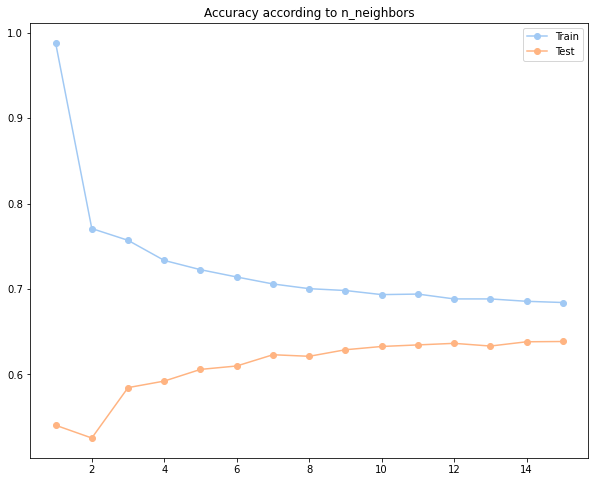

In [22]:
k = [i for i in range(1, 2*int(nn))]
train_scores = list()
test_scores = list()

for i in k:
    model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)

    train_y_pred= model.predict(X_train)
    train_acc = accuracy_score(y_train, train_y_pred)
    train_scores.append(train_acc)

    test_y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(k, train_scores, '-o', label='Train')
plt.plot(k, test_scores, '-o', label='Test')
plt.legend()
plt.title('Accuracy according to n_neighbors')
plt.show()

We can see **converage** of model and training data in here.

In [23]:
k_nearest_neighbors_classifier = KNeighborsClassifier(n_neighbors=16)
k_nearest_neighbors_classifier.fit(X_train, y_train)
y_pred = k_nearest_neighbors_classifier.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))
print(f'Accuracy for K-Nearest Neighbors is \x1b[1;33m{accuracy_score(y_test, y_pred)}\x1b[0m')

              precision    recall  f1-score   support

 Alternative       0.48      0.39      0.43      1024
   Classical       0.90      0.89      0.90       969
     Country       0.53      0.58      0.55      1046
        Jazz       0.67      0.59      0.63       978
         Rap       0.70      0.79      0.74       950
        Rock       0.55      0.61      0.58      1033

    accuracy                           0.64      6000
   macro avg       0.64      0.64      0.64      6000
weighted avg       0.64      0.64      0.63      6000

Accuracy for K-Nearest Neighbors is 0.637


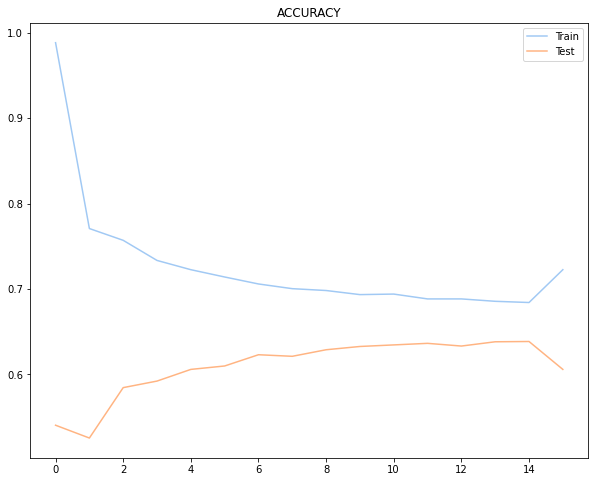

In [25]:
model = KNeighborsClassifier().fit(X_train, y_train)

train_y_pred= model.predict(X_train)
train_acc = accuracy_score(y_train, train_y_pred)
train_scores.append(train_acc)

test_y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, test_y_pred)
test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(train_scores, label='Train')
plt.plot(test_scores, label='Test')
plt.legend()
plt.title('ACCURACY')
plt.show()

<h2>Decision Tree</h2>

<h3>Introduction</h3>

- Used in supervised machine learning
- A technique which uses labelled input and output datasets to train models
- Mainly used to solve classification problems, which is the use of a model to categorise or classify an object

<h3>Advantages and Disadvantages</h3>

- **Advantages**:
    - simplicity to understand and visualize 
    - requires very little data preparation
- **Disadvantage**:
    - may create complex trees 
    - unstable because even a simplistic change in the data can hinder the whole structure of the decision tree
    
<h3>Use Cases</h3>

- Data exploration
- Pattern Recognition
- Option pricing in finances
- Identifying disease and risk threats

<h3>Hyper-Parameters</h3>

- **max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
- **min_samples_leaf**:The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

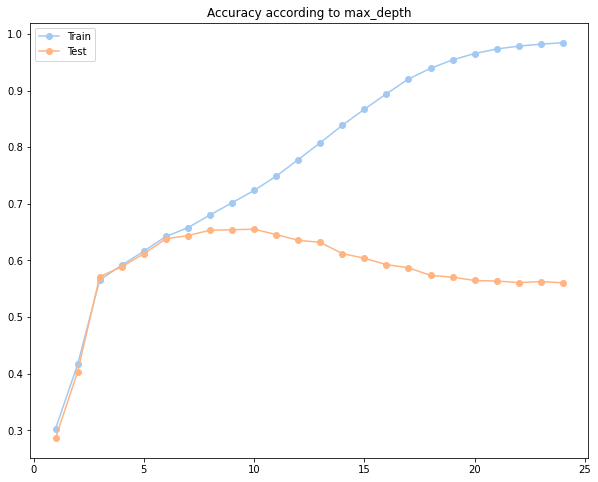

In [26]:
depths = [i for i in range(1, 25)]
train_scores = list()
test_scores = list()

for i in depths:
    model = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)

    train_y_pred= model.predict(X_train)
    train_acc = accuracy_score(y_train, train_y_pred)
    train_scores.append(train_acc)

    test_y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(depths, train_scores, '-o', label='Train')
plt.plot(depths, test_scores, '-o', label='Test')
plt.legend()
plt.title('Accuracy according to max_depth')
plt.show()

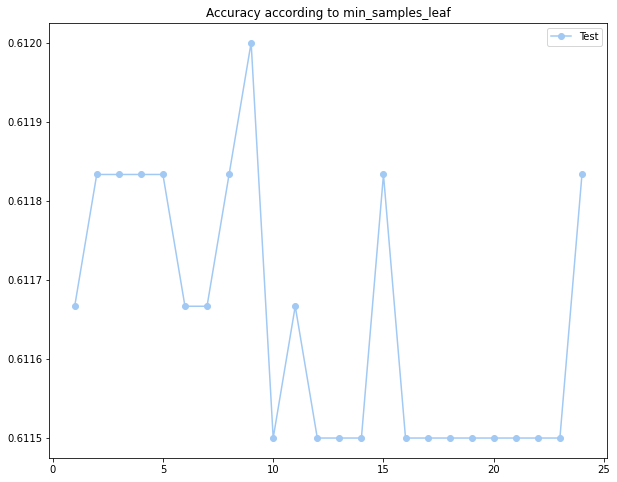

In [27]:
min_leaf = [i for i in range(1, 25)]
train_scores = list()
test_scores = list()

for i in min_leaf:
    model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=i).fit(X_train, y_train)
    
    train_y_pred= model.predict(X_train)
    train_acc = accuracy_score(y_train, train_y_pred)
    train_scores.append(train_acc)

    test_y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(min_leaf, test_scores, '-o', label='Test')
plt.legend()
plt.title('Accuracy according to min_samples_leaf')
plt.show()

In [28]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=5, min_samples_leaf=11)
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))
print(f'Accuracy for Decision Tree is \x1b[1;33m{accuracy_score(y_test, y_pred)}\x1b[0m')

              precision    recall  f1-score   support

 Alternative       0.39      0.41      0.40      1024
   Classical       0.86      0.85      0.85       969
     Country       0.65      0.41      0.50      1046
        Jazz       0.58      0.59      0.58       978
         Rap       0.75      0.73      0.74       950
        Rock       0.53      0.71      0.61      1033

    accuracy                           0.61      6000
   macro avg       0.63      0.62      0.61      6000
weighted avg       0.62      0.61      0.61      6000

Accuracy for Decision Tree is 0.6116666666666667


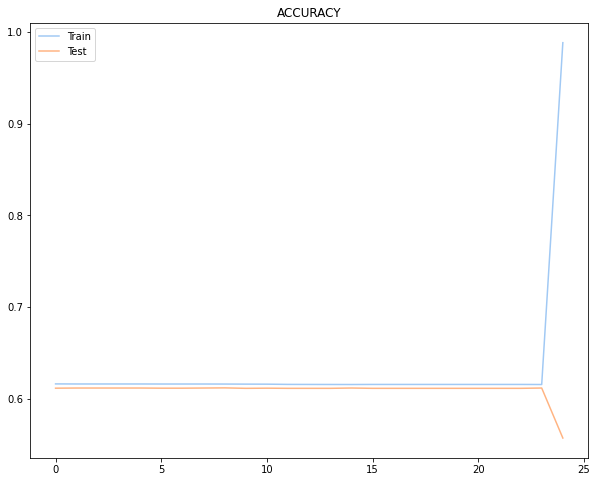

In [30]:
model = DecisionTreeClassifier().fit(X_train, y_train)

train_y_pred= model.predict(X_train)
train_acc = accuracy_score(y_train, train_y_pred)
train_scores.append(train_acc)

test_y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, test_y_pred)
test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(train_scores, label='Train')
plt.plot(test_scores, label='Test')
plt.legend()
plt.title('ACCURACY')
plt.show()

<h2>Random Forest</h2>

<h3>Introduction</h3>

- A meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset
- Uses averaging to improve the predictive accuracy and control over-fitting
- An ensemble learning method
- Used in both:
    - classification
    - regression

<h3>Advantages and Disadvantages</h3>

- **Advantages**:
    - it is more accurate than the decision trees due to the reduction in the over-fitting
- **Disadvantage**:
    - complex in implementation
    - very slow in real-time prediction
    
<h3>Use Cases</h3>

- Industrial applications such as finding if a loan applicant is high-risk or low-risk
- For Predicting the failure of  mechanical parts in automobile engines
- Predicting social media share scores
- Performance scores

<h3>Hyper-Parameters</h3>

- **n_estimators**: The number of trees in the forest
- **max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample
- **min_samples_leaf**:The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression

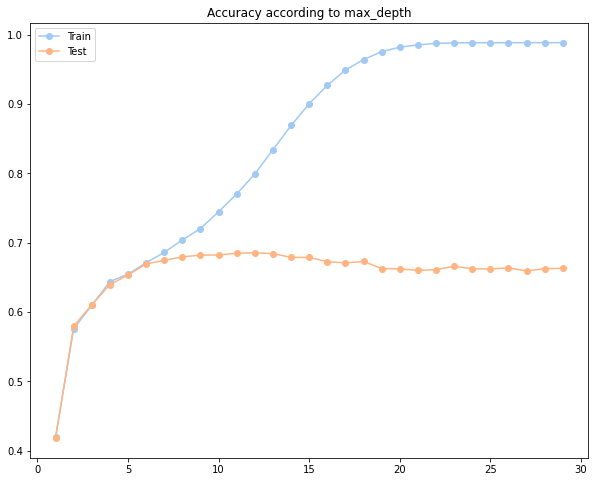

In [31]:
depths = [i for i in range(1, 30)]
train_scores = list()
test_scores = list()

for i in depths:
    model = RandomForestClassifier(max_depth=i).fit(X_train, y_train)

    train_y_pred= model.predict(X_train)
    train_acc = accuracy_score(y_train, train_y_pred)
    train_scores.append(train_acc)

    test_y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(depths, train_scores, '-o', label='Train')
plt.plot(depths, test_scores, '-o', label='Test')
plt.legend()
plt.title('Accuracy according to max_depth')
plt.show()

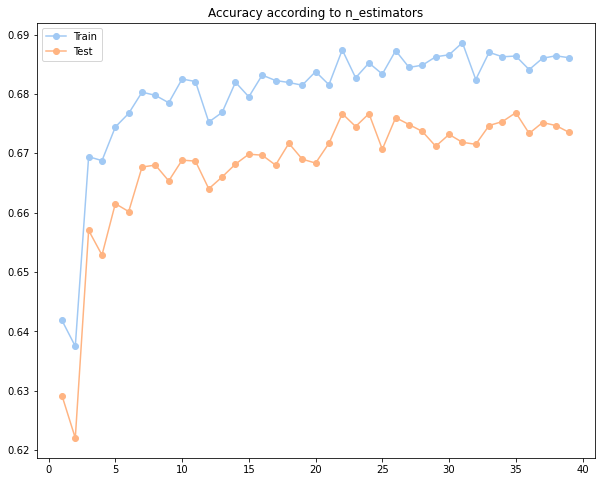

In [32]:
n_estimator = [i for i in range(1, 40)]
train_scores = list()
test_scores = list()

for i in n_estimator:
    model = RandomForestClassifier(max_depth=7, n_estimators=i).fit(X_train, y_train)

    train_y_pred= model.predict(X_train)
    train_acc = accuracy_score(y_train, train_y_pred)
    train_scores.append(train_acc)

    test_y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(n_estimator, train_scores, '-o', label='Train')
plt.plot(n_estimator, test_scores, '-o', label='Test')
plt.legend()
plt.title('Accuracy according to n_estimators')
plt.show()

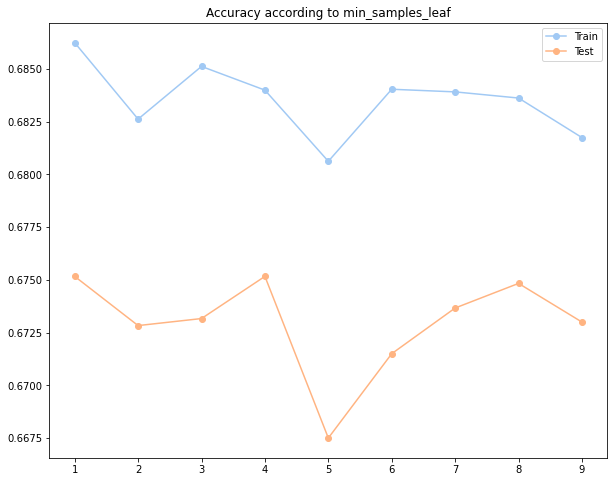

In [33]:
min_leafs = [i for i in range(1, 10)]
train_scores = list()
test_scores = list()

for i in min_leafs:
    model = RandomForestClassifier(max_depth=7, n_estimators=27, min_samples_leaf=i).fit(X_train, y_train)

    train_y_pred= model.predict(X_train)
    train_acc = accuracy_score(y_train, train_y_pred)
    train_scores.append(train_acc)

    test_y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(min_leafs, train_scores, '-o', label='Train')
plt.plot(min_leafs, test_scores, '-o', label='Test')
plt.legend()
plt.title('Accuracy according to min_samples_leaf')
plt.show()

In [34]:
rndm_frst_classifier = RandomForestClassifier(max_depth=5)
rndm_frst_classifier.fit(X_train, y_train)
y_pred = rndm_frst_classifier.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred))
print(f'Accuracy for Random Forest is \x1b[1;33m{accuracy_score(y_test, y_pred)}\x1b[0m')

              precision    recall  f1-score   support

 Alternative       0.63      0.24      0.35      1024
   Classical       0.90      0.85      0.88       969
     Country       0.59      0.59      0.59      1046
        Jazz       0.65      0.65      0.65       978
         Rap       0.70      0.79      0.74       950
        Rock       0.52      0.81      0.64      1033

    accuracy                           0.65      6000
   macro avg       0.67      0.66      0.64      6000
weighted avg       0.66      0.65      0.64      6000

Accuracy for Random Forest is 0.6521666666666667


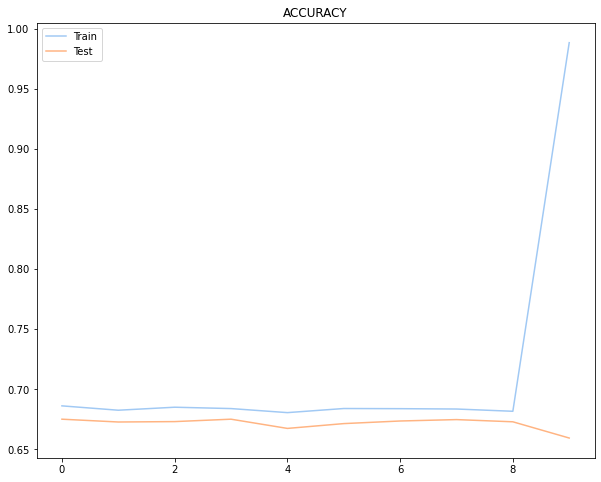

In [36]:
model = RandomForestClassifier().fit(X_train, y_train)

train_y_pred= model.predict(X_train)
train_acc = accuracy_score(y_train, train_y_pred)
train_scores.append(train_acc)

test_y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, test_y_pred)
test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(train_scores, label='Train')
plt.plot(test_scores, label='Test')
plt.legend()
plt.title('ACCURACY')
plt.show()

<h2>Evaluation in Machine Learning</h2>

<h3>Introduction</h3>

The process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

The three main metrics used to evaluate a classification model are
- accuracy: is defined as the percentage of correct predictions for the test data
- precision: the fraction of relevant examples among all of the examples which were predicted to belong in a certain class
- recall: is defined as the fraction of examples which were predicted to belong to a class with respect to all of the examples that truly belong in the class
- f1 score: the harmonic mean between precision and recall

<h3>Classification metrics</h3>

- **True positives** are when you predict an observation belongs to a class and it actually does belong to that class.
- **True negatives** are when you predict an observation does not belong to a class and it actually does not belong to that class.
- **False positives** are when you predict an observation belongs to a class when in reality it does not.
- **False negatives** are when you predict an observation does not belong to a class when in fact it does.

<h3>Accuracy = $\frac{correct predictions}{all predictions} $</h3>
<h3>Precision = $\frac{true positives}{true positives + false positives} $</h3>
<h3>Recall = $\frac{true positives}{true positives + false negatives} $</h3>

<h3>Confusion Matrix</h3>

- It is used to define the performance of a classification algorithm
- Visualizes and summarizes the performance of a classification algorithm

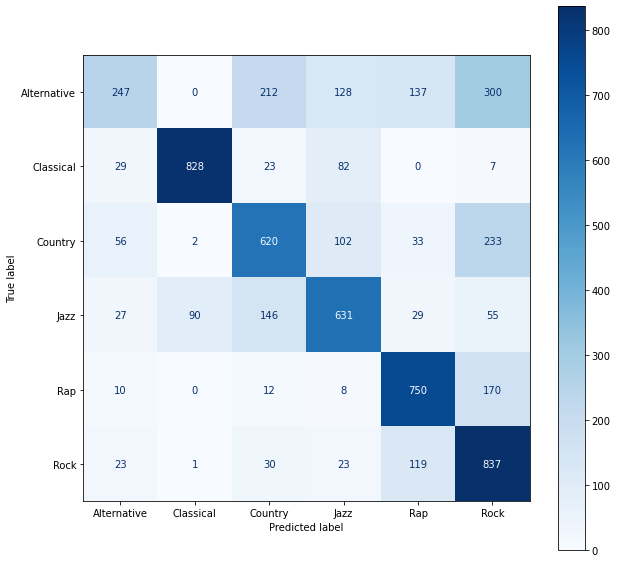

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
matrix = ConfusionMatrixDisplay.from_estimator(rndm_frst_classifier, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()

<h2>Classifying with artist_name</h2>

In [38]:
X, y = train_set_with_artist.drop(["music_genre"], axis=1), train_set_with_artist['music_genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
nn = math.log(3000)

<h3>K-Nearest Neighbors</h3>

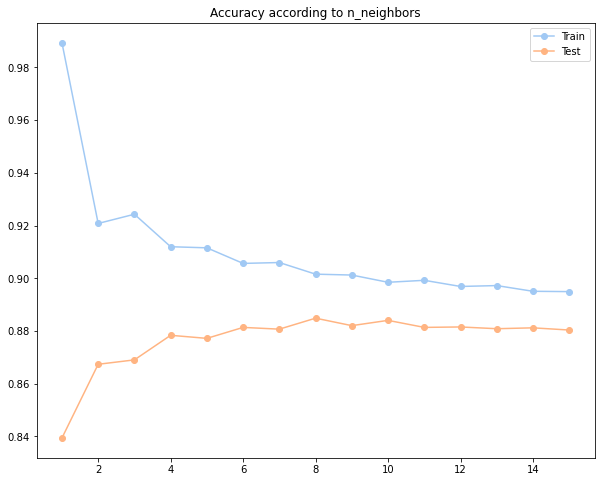

In [39]:
k = [i for i in range(1, 2*int(nn))]
train_scores = list()
test_scores = list()

for i in k:
    model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)

    train_y_pred= model.predict(X_train)
    train_acc = accuracy_score(y_train, train_y_pred)
    train_scores.append(train_acc)

    test_y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(k, train_scores, '-o', label='Train')
plt.plot(k, test_scores, '-o', label='Test')
plt.legend()
plt.title('Accuracy according to n_neighbors')
plt.show()

In [40]:
k_nearest_neighbors_classifier = KNeighborsClassifier(n_neighbors=16)
k_nearest_neighbors_classifier.fit(X_train, y_train)
y_pred = k_nearest_neighbors_classifier.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))
print(f'Accuracy for K-Nearest Neighbors is \x1b[1;33m{accuracy_score(y_test, y_pred)}\x1b[0m')

              precision    recall  f1-score   support

 Alternative       0.71      0.91      0.80      1024
   Classical       0.99      0.99      0.99       969
     Country       0.85      0.93      0.89      1046
        Jazz       0.96      0.98      0.97       978
         Rap       0.95      0.89      0.92       950
        Rock       0.91      0.60      0.72      1033

    accuracy                           0.88      6000
   macro avg       0.89      0.88      0.88      6000
weighted avg       0.89      0.88      0.88      6000

Accuracy for K-Nearest Neighbors is 0.8808333333333334


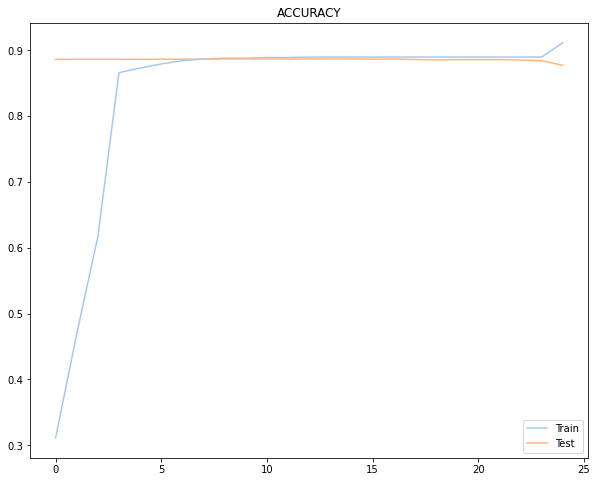

In [46]:
model = KNeighborsClassifier().fit(X_train, y_train)

train_y_pred= model.predict(X_train)
train_acc = accuracy_score(y_train, train_y_pred)
train_scores.append(train_acc)

test_y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, test_y_pred)
test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(train_scores, label='Train')
plt.plot(test_scores, label='Test')
plt.legend()
plt.title('ACCURACY')
plt.show()

<h3>Decision Tree</h3>

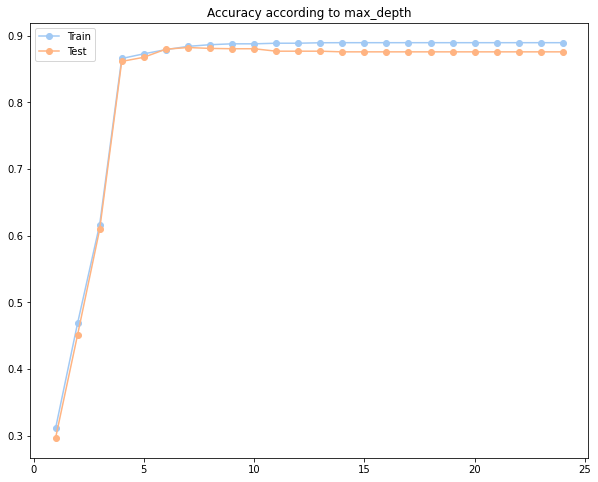

In [43]:
depths = [i for i in range(1, 25)]
train_scores = list()
test_scores = list()

for i in depths:
    model = DecisionTreeClassifier(max_depth=i, min_samples_leaf=77).fit(X_train, y_train)

    train_y_pred= model.predict(X_train)
    train_acc = accuracy_score(y_train, train_y_pred)
    train_scores.append(train_acc)

    test_y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(depths, train_scores, '-o', label='Train')
plt.plot(depths, test_scores, '-o', label='Test')
plt.legend()
plt.title('Accuracy according to max_depth')
plt.show()

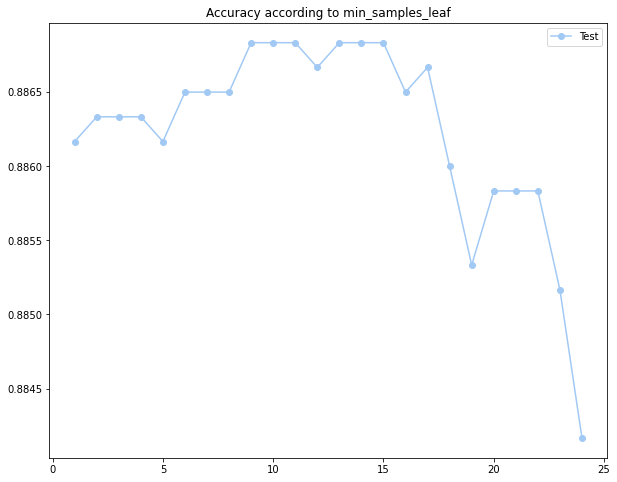

In [44]:
min_leaf = [i for i in range(1, 25)]
test_scores = list()

for i in min_leaf:
    model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=i).fit(X_train, y_train)

    test_y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(min_leaf, test_scores, '-o', label='Test')
plt.legend()
plt.title('Accuracy according to min_samples_leaf')
plt.show()

In [45]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5)
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))
print(f'Accuracy for Decision Tree is \x1b[1;33m{accuracy_score(y_test, y_pred)}\x1b[0m')

              precision    recall  f1-score   support

 Alternative       0.77      0.84      0.80      1024
   Classical       0.99      0.99      0.99       969
     Country       0.86      0.92      0.89      1046
        Jazz       0.96      0.98      0.97       978
         Rap       0.99      0.87      0.93       950
        Rock       0.79      0.73      0.76      1033

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.89      6000
weighted avg       0.89      0.89      0.89      6000

Accuracy for Decision Tree is 0.8861666666666667


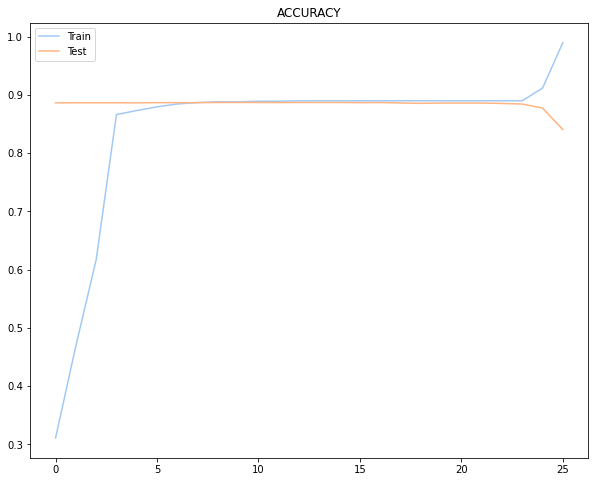

In [48]:
model = DecisionTreeClassifier().fit(X_train, y_train)

train_y_pred= model.predict(X_train)
train_acc = accuracy_score(y_train, train_y_pred)
train_scores.append(train_acc)

test_y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, test_y_pred)
test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(train_scores, label='Train')
plt.plot(test_scores, label='Test')
plt.legend()
plt.title('ACCURACY')
plt.show()

<h3>Random Forest</h3>

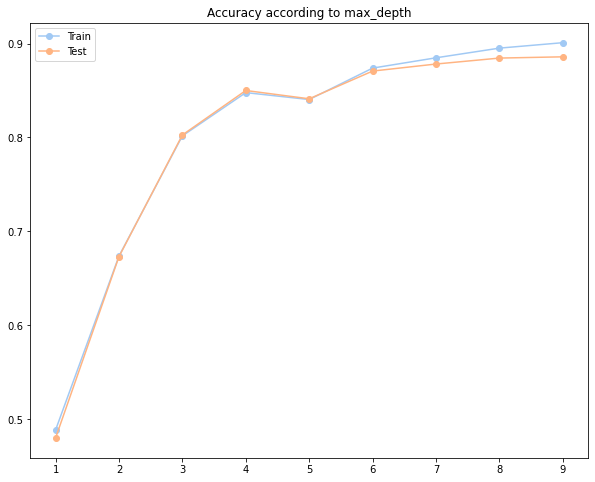

In [49]:
depths = [i for i in range(1, 10)]
train_scores = list()
test_scores = list()

for i in depths:
    model = RandomForestClassifier(max_depth=i).fit(X_train, y_train)

    train_y_pred= model.predict(X_train)
    train_acc = accuracy_score(y_train, train_y_pred)
    train_scores.append(train_acc)

    test_y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(depths, train_scores, '-o', label='Train')
plt.plot(depths, test_scores, '-o', label='Test')
plt.legend()
plt.title('Accuracy according to max_depth')
plt.show()

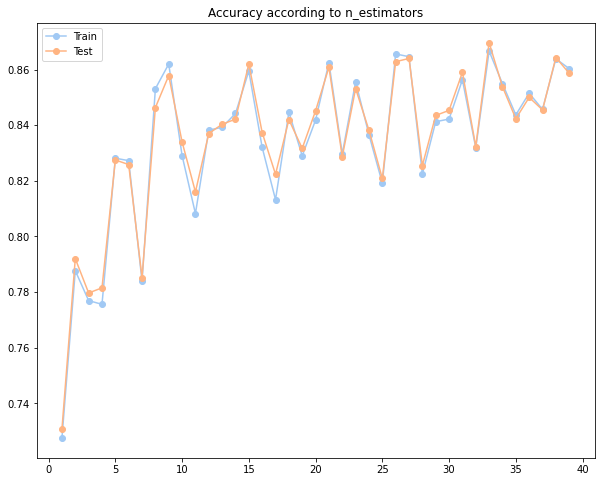

In [50]:
n_estimator = [i for i in range(1, 40)]
train_scores = list()
test_scores = list()

for i in n_estimator:
    model = RandomForestClassifier(max_depth=5, n_estimators=i).fit(X_train, y_train)

    train_y_pred= model.predict(X_train)
    train_acc = accuracy_score(y_train, train_y_pred)
    train_scores.append(train_acc)

    test_y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(n_estimator, train_scores, '-o', label='Train')
plt.plot(n_estimator, test_scores, '-o', label='Test')
plt.legend()
plt.title('Accuracy according to n_estimators')
plt.show()

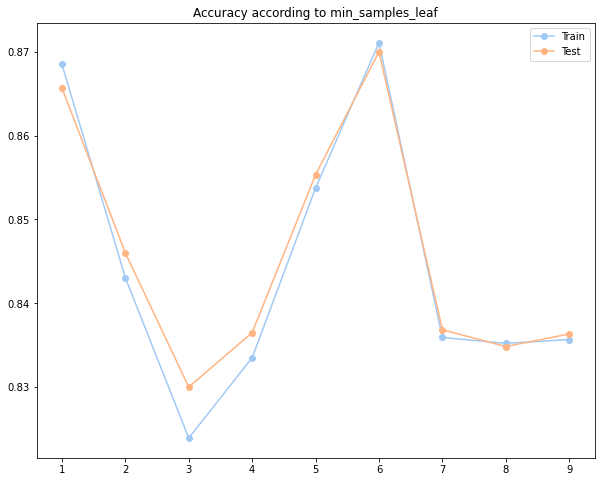

In [51]:
min_leafs = [i for i in range(1, 10)]
train_scores = list()
test_scores = list()

for i in min_leafs:
    model = RandomForestClassifier(max_depth=5, n_estimators=29, min_samples_leaf=i).fit(X_train, y_train)

    train_y_pred= model.predict(X_train)
    train_acc = accuracy_score(y_train, train_y_pred)
    train_scores.append(train_acc)

    test_y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(min_leafs, train_scores, '-o', label='Train')
plt.plot(min_leafs, test_scores, '-o', label='Test')
plt.legend()
plt.title('Accuracy according to min_samples_leaf')
plt.show()

In [55]:
rndm_frst_classifier = RandomForestClassifier(max_depth=6, n_estimators=32, min_samples_leaf=6)
rndm_frst_classifier.fit(X_train, y_train)
y_pred = rndm_frst_classifier.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred))
print(f'Accuracy for Random Forest is \x1b[1;33m{accuracy_score(y_test, y_pred)}\x1b[0m')

              precision    recall  f1-score   support

 Alternative       0.73      0.87      0.79      1024
   Classical       1.00      0.97      0.98       969
     Country       0.88      0.86      0.87      1046
        Jazz       0.91      0.99      0.95       978
         Rap       0.93      0.91      0.92       950
        Rock       0.83      0.66      0.73      1033

    accuracy                           0.87      6000
   macro avg       0.88      0.88      0.87      6000
weighted avg       0.88      0.87      0.87      6000

Accuracy for Random Forest is 0.8733333333333333


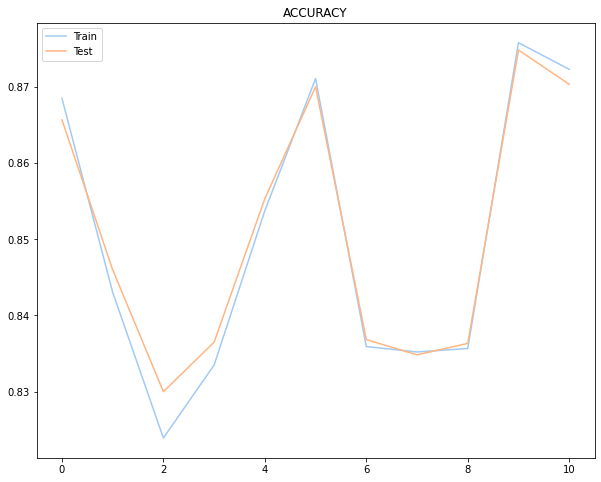

In [57]:
model = RandomForestClassifier(max_depth=6, n_estimators=32, min_samples_leaf=6).fit(X_train, y_train)

train_y_pred= model.predict(X_train)
train_acc = accuracy_score(y_train, train_y_pred)
train_scores.append(train_acc)

test_y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, test_y_pred)
test_scores.append(test_acc)

plt.figure(figsize=(10, 8))
plt.plot(train_scores, label='Train')
plt.plot(test_scores, label='Test')
plt.legend()
plt.title('ACCURACY')
plt.show()

<h3>Confusion Matrix</h3>

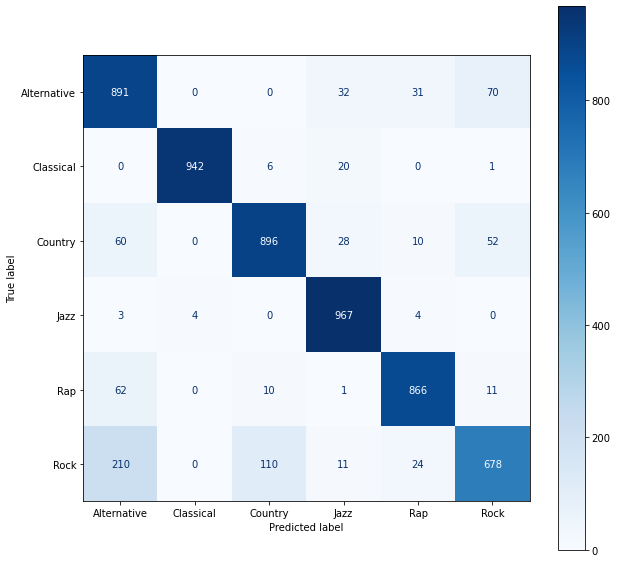

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))
matrix = ConfusionMatrixDisplay.from_estimator(rndm_frst_classifier, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show()